
### **A Global Data-Driven Analysis of Life Expectancy: Patterns, Predictors, and Policy Implications**

## Objectives

### 1. Identify the Key Drivers of Life Expectancy  
**WHY:** To uncover which social, economic, and healthcare factors most influence longevity across nations, enabling targeted policy interventions.  
**HOW:** Train machine learning models (Random Forest, XGBoost) using predictors like Adult Mortality, HIV/AIDS, Schooling, GDP, and Health Expenditure. Extract feature importance scores and use SHAP values for interpretability.


### 2. Examine Inequality in Life Expectancy  
**WHY:** To understand how life expectancy varies by country development status and quantify disparities.  
**HOW:** Use the `Status` column to group countries (Developed vs Developing). Visualize differences using box plots, violin plots, and compute group summary statistics.


### 3. Investigate the Role of Specific Health Interventions  
**WHY:** To assess the impact of public health measures (e.g., vaccination coverage) on life expectancy.  
**HOW:** Perform regression analyses relating life expectancy to variables such as Hepatitis B, Polio, and Diphtheria vaccination rates and health expenditure. Conduct subgroup analysis with defined thresholds.


### 4. Model and Forecast Future Life Expectancy  
**WHY:** To support long-term planning in healthcare and demographics by projecting life expectancy trends.  
**HOW:** Use Random Forest and XGBoost regression models trained on historical data. Consider time series modeling if temporal coverage is sufficient.


### 5. Perform Distributional Analysis of Life Expectancy  
**WHY:** To assess whether life expectancy is normally distributed or exhibits skewness and outliers.  
**HOW:** Use histograms, Q-Q plots, and compute skewness and kurtosis statistics overall and within `Status` groups.


### 6. Assess Impact of Shocks on Life Expectancy  
**WHY:** To understand the influence of major health events or crises (e.g., disease outbreaks) on life expectancy.  
**HOW:** Use proxy variables—such as spikes in HIV/AIDS prevalence or adult mortality rates—to simulate shocks. Evaluate changes using model predictions or counterfactual scenarios.


### 7. Identify Outlier Countries (“Positive Deviants”)  
**WHY:** To spotlight countries that exceed expectations despite challenges, offering policy learning opportunities.  
**HOW:** Analyze residuals from prediction models to identify over- and under-performers, then investigate contributing factors.


In [105]:
#Import Necessary Libraries
import pandas as pd      
import numpy as np      
import matplotlib.pyplot as plt 
import seaborn as sb    
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression     
from sklearn.metrics import r2_score, mean_absolute_error 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer 
import plotly.express as px  
from mpl_toolkits.mplot3d import Axes3D
  


In [106]:
# Load the dataset
df = pd.read_csv('Life_Expectancy_Data.csv')  

df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [107]:
df = pd.read_csv("Life_Expectancy_Data.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [108]:
df.shape 

(1649, 22)

In [109]:
df['Country'] = df['Country'].astype('category')
df['Status'] = df['Status'].astype('category')

print("Updated Data Types:")
print(df.dtypes[['Country', 'Status']])


Updated Data Types:
Country    category
Status     category
dtype: object


In [110]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

In [111]:
#Checking if there are any duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [112]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_table = pd.DataFrame({
    'Missing Values': missing_values,
    '% Missing': missing_percent.round(2)
}).sort_values(by='Missing Values', ascending=False)

print(" Missing Values Summary:")
display(missing_table)

 Missing Values Summary:


,Missing Values,% Missing
Country,0,0.0
Year,0,0.0
Status,0,0.0
Life expectancy,0,0.0
Adult Mortality,0,0.0
infant deaths,0,0.0
Alcohol,0,0.0
percentage expenditure,0,0.0
Hepatitis B,0,0.0
Measles,0,0.0


In [113]:
# Checking for skewness in numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numerical_cols].skew()
print("\nSkewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
Year                               -0.200171
Life expectancy                    -0.628758
Adult Mortality                     1.276429
infant deaths                       8.477369
Alcohol                             0.662518
percentage expenditure              4.980574
Hepatitis B                        -1.793377
Measles                             7.957838
BMI                                -0.233601
under-five deaths                   8.340863
Polio                              -2.360177
Total expenditure                   0.213362
Diphtheria                         -2.487492
HIV/AIDS                            4.974176
GDP                                 4.517297
Population                         14.186299
thinness  1-19 years                1.821074
thinness 5-9 years                  1.866980
Income composition of resources    -1.155244
Schooling                          -0.128164
dtype: float64


In [114]:
high_skew = skewness[abs(skewness) >= 5].index
for col in high_skew:
    df[col] = np.log1p(df[col])
    print(f"Applied log transformation to {col}")   
    
skewness = df[numerical_cols].skew()
print("\nSkewness after transformation:")
print(skewness)

Applied log transformation to infant deaths
Applied log transformation to Measles
Applied log transformation to under-five deaths
Applied log transformation to Population

Skewness after transformation:
Year                              -0.200171
Life expectancy                   -0.628758
Adult Mortality                    1.276429
infant deaths                      0.718501
Alcohol                            0.662518
percentage expenditure             4.980574
Hepatitis B                       -1.793377
Measles                            0.560259
BMI                               -0.233601
under-five deaths                  0.666207
Polio                             -2.360177
Total expenditure                  0.213362
Diphtheria                        -2.487492
HIV/AIDS                           4.974176
GDP                                4.517297
Population                        -0.544872
thinness  1-19 years               1.821074
thinness 5-9 years                 1.866980
Incom

In [115]:
# Correlation matrix with target variable
correlation = df.corr(numeric_only=True)['Life expectancy'].sort_values(ascending=False)
print("Correlation with Life Expectancy:\n")
print(correlation)



Correlation with Life Expectancy:

Life expectancy                    1.000000
Schooling                          0.727630
Income composition of resources    0.721083
BMI                                0.542042
GDP                                0.441322
percentage expenditure             0.409631
Alcohol                            0.402718
Diphtheria                         0.341331
Polio                              0.327294
Hepatitis B                        0.199935
Total expenditure                  0.174718
Year                               0.050771
Population                        -0.100433
Measles                           -0.253603
thinness 5-9 years                -0.457508
thinness  1-19 years              -0.457838
infant deaths                     -0.517603
under-five deaths                 -0.546867
HIV/AIDS                          -0.592236
Adult Mortality                   -0.702523
Name: Life expectancy, dtype: float64


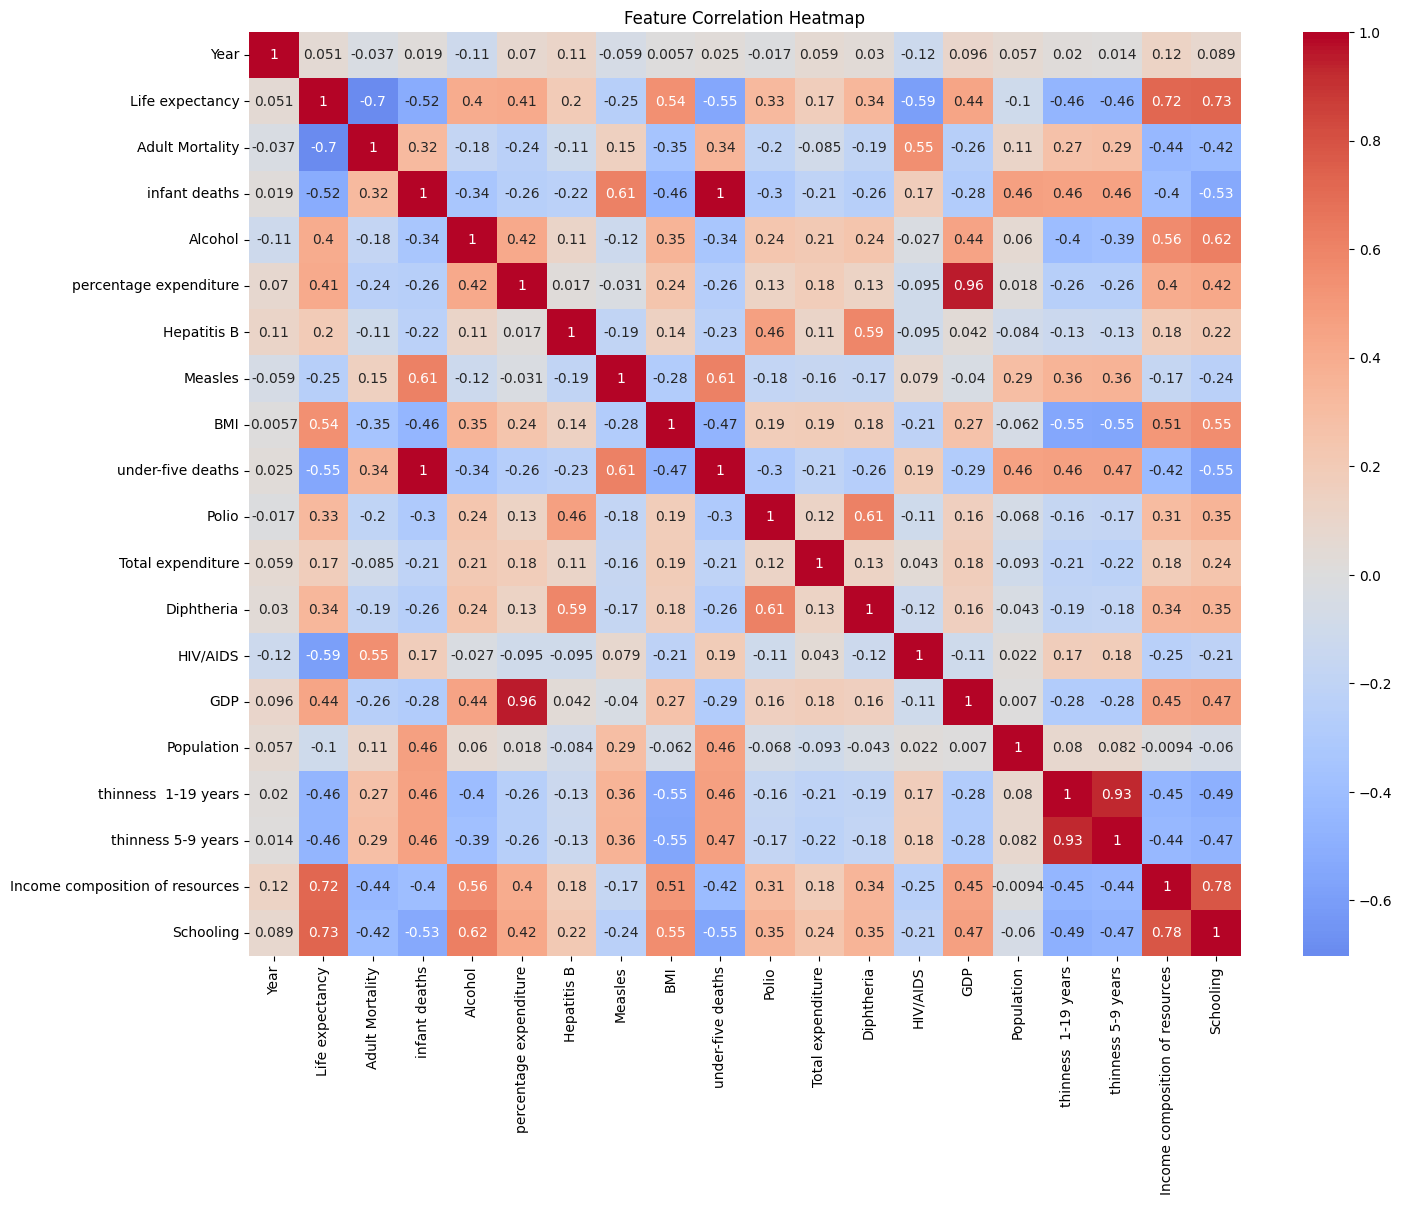

In [116]:
plt.figure(figsize=(16, 12))
sb.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [117]:
# Remove Highly Correlated Features to avoid redundancy (|correlation|>0.8)
# Getting rid of under-five deaths column since it is perfectly positively correlated with infant deaths hence a redundant feature
df.drop(columns=['under-five deaths'], inplace=True)
df.shape

# Getting rid of thinness 5-9 since it is very highly positively correlated with thinness 1-19 years hence a redundant feature
df.drop(columns=['thinness 5-9 years'], inplace=True)

# Gettting rid of percent expenditure since it is highly negatively correlated with GDP
df.drop(columns=['percentage expenditure'], inplace=True)

In [118]:
#GDP per Capita
df['GDP_per_capita'] = df['GDP'] / df['Population']
df['GDP_per_capita'] = df['GDP_per_capita'].fillna(df['GDP_per_capita'].mean())

#Vaccination Composite Feature
df['Vaccination'] = df[['Hepatitis B', 'Measles', 'Polio', 'Diphtheria']].mean(axis=1)

#BMI Categories
bins = [0, 18.5, 25, 30, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

#Total Expenditure per Capita
df['Total_expenditure_per_capita'] = df['Total expenditure'] / df['Population']



df[['GDP_per_capita','Vaccination','BMI Category','Total_expenditure_per_capita']].head()



,GDP_per_capita,Vaccination,BMI Category,Total_expenditure_per_capita
0,33.705789,35.762964,Normal,0.470749
1,48.245732,47.050127,Normal,0.644120
2,36.574499,49.016527,Underweight,0.470682
3,44.300606,52.233270,Underweight,0.563379
4,4.262252,53.002756,Underweight,0.527941


In [119]:
# One-hot encode 'BMI Category', drop the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=['BMI Category'], drop_first=True)


In [120]:
df['Status_original'] = df['Status']  # save original first
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1}).astype(int)


In [121]:
df[['GDP_per_capita', 'Vaccination', 'Total_expenditure_per_capita', 'Life expectancy']].corr()


,GDP_per_capita,Vaccination,Total_expenditure_per_capita,Life expectancy
GDP_per_capita,1.000000,0.137467,0.198158,0.425759
Vaccination,0.137467,1.000000,0.127386,0.329484
Total_expenditure_per_capita,0.198158,0.127386,1.000000,0.193366
Life expectancy,0.425759,0.329484,0.193366,1.000000


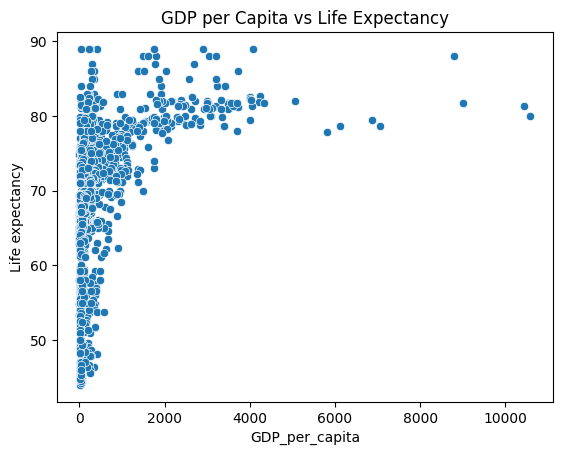

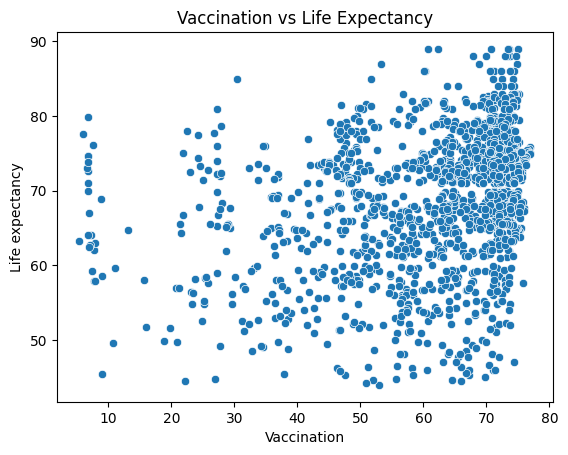

In [122]:

sb.scatterplot(x='GDP_per_capita', y='Life expectancy', data=df)
plt.title('GDP per Capita vs Life Expectancy')
plt.show()

sb.scatterplot(x='Vaccination', y='Life expectancy', data=df)
plt.title('Vaccination vs Life Expectancy')
plt.show()


In [123]:

from sklearn.metrics import mean_squared_error, r2_score

baseline_features = [
    'Status',
    'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
    'Income composition of resources', 'Schooling'
]

engineered_features = [
    'GDP_per_capita', 'Vaccination', 'Total_expenditure_per_capita',
    'BMI Category_Normal', 'BMI Category_Overweight', 'BMI Category_Obese'
]

target = 'Life expectancy'


# Prepare datasets
X_baseline = df[baseline_features]
X_enhanced = df[baseline_features + engineered_features]
y = df[target]



# 3. Train-test split (same seed)
Xb_train, Xb_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)
Xe_train, Xe_test, _, _ = train_test_split(X_enhanced, y, test_size=0.2, random_state=42)

# 4. Initialize models
rf_baseline = RandomForestRegressor(random_state=42)
rf_enhanced = RandomForestRegressor(random_state=42)

# 5. Train models
rf_baseline.fit(Xb_train, y_train)
rf_enhanced.fit(Xe_train, y_train)

# 6. Predict and evaluate
y_pred_baseline = rf_baseline.predict(Xb_test)
y_pred_enhanced = rf_enhanced.predict(Xe_test)

rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
rmse_enhanced = np.sqrt(mean_squared_error(y_test, y_pred_enhanced))

r2_baseline = r2_score(y_test, y_pred_baseline)
r2_enhanced = r2_score(y_test, y_pred_enhanced)

print(f'Baseline RMSE: {rmse_baseline:.3f}, R²: {r2_baseline:.3f}')
print(f'Enhanced RMSE: {rmse_enhanced:.3f}, R²: {r2_enhanced:.3f}')



Baseline RMSE: 1.884, R²: 0.950
Enhanced RMSE: 1.920, R²: 0.948


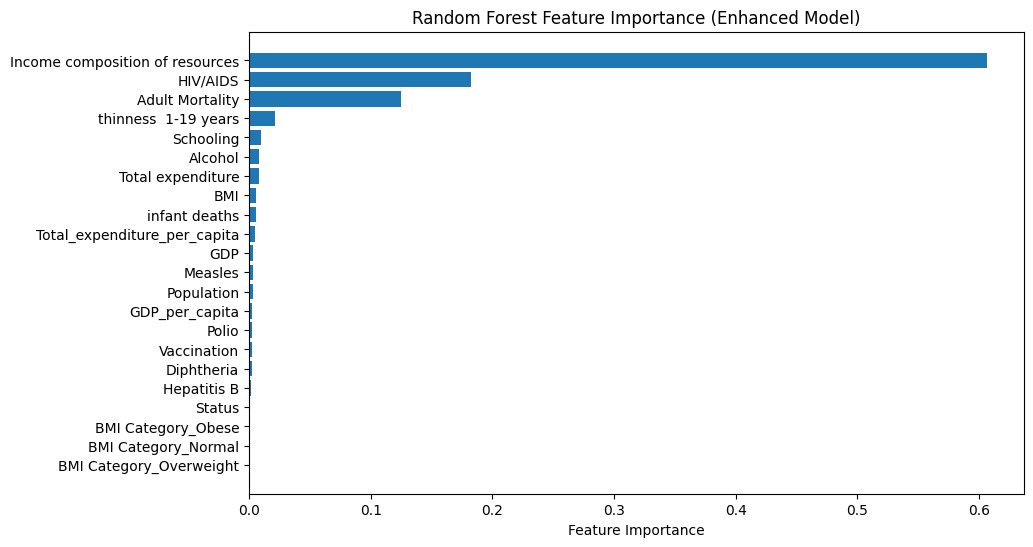

In [97]:
importances = rf_enhanced.feature_importances_
feature_names = X_enhanced.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Enhanced Model)')
plt.gca().invert_yaxis()
plt.show()


In [98]:


# 1. Feature definitions
baseline_features = [
    'Status',
    'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles', 'BMI', 'Polio',
    'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
    'Income composition of resources', 'Schooling'
]

engineered_features = [
    'GDP_per_capita', 'Vaccination', 'Total_expenditure_per_capita',
    'BMI Category_Normal', 'BMI Category_Overweight', 'BMI Category_Obese'
]

target = 'Life expectancy'

# 2. Prepare data
X_baseline = df[baseline_features]
X_enhanced = df[baseline_features + engineered_features]
y = df[target]

# 3. Train-test split
Xb_train, Xb_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)
Xe_train, Xe_test, _, _ = train_test_split(X_enhanced, y, test_size=0.2, random_state=42)

# 4. Initialize XGBoost models
xgb_baseline = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_enhanced = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# 5. Train models
xgb_baseline.fit(Xb_train, y_train)
xgb_enhanced.fit(Xe_train, y_train)

# 6. Predict and evaluate
y_pred_baseline = xgb_baseline.predict(Xb_test)
y_pred_enhanced = xgb_enhanced.predict(Xe_test)

rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
rmse_enhanced = np.sqrt(mean_squared_error(y_test, y_pred_enhanced))

r2_baseline = r2_score(y_test, y_pred_baseline)
r2_enhanced = r2_score(y_test, y_pred_enhanced)

print(f'XGBoost Baseline RMSE: {rmse_baseline:.3f}, R²: {r2_baseline:.3f}')
print(f'XGBoost Enhanced RMSE: {rmse_enhanced:.3f}, R²: {r2_enhanced:.3f}')


XGBoost Baseline RMSE: 2.024, R²: 0.942
XGBoost Enhanced RMSE: 2.087, R²: 0.939


 97%|=================== | 319/330 [00:30<00:01]       

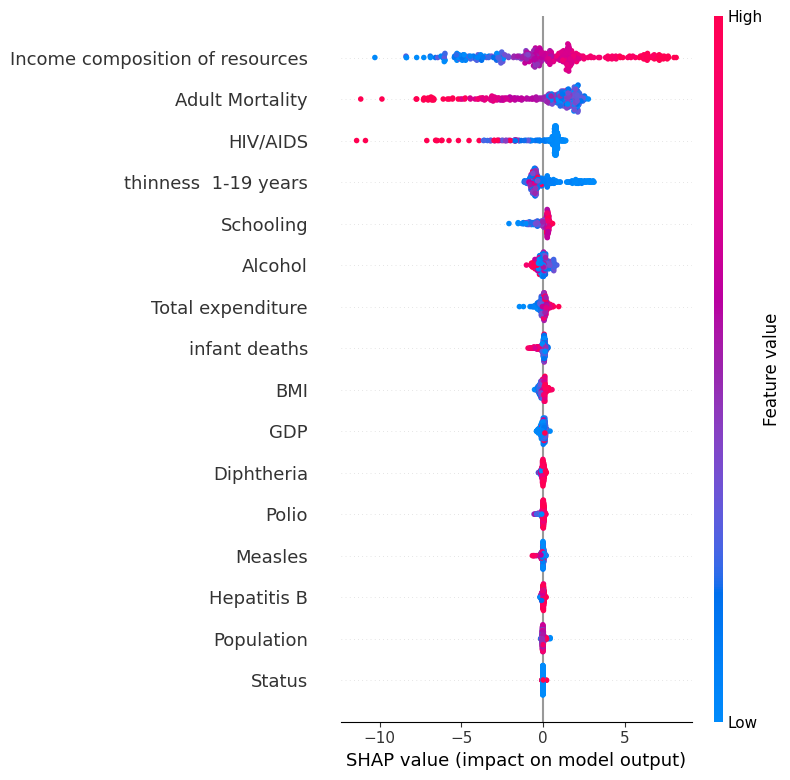

In [101]:

import shap
# Create the SHAP explainer
explainer = shap.Explainer(rf_baseline, Xb_test)

#Compute SHAP values
shap_values = explainer(Xb_test)

# Visualize feature importance (summary plot)
shap.summary_plot(shap_values, Xb_test)


Objective 2: Examine Inequality in Life Expectancy

In [124]:
# Check unique values in Status
print(df['Status'].unique())

# Group data by 'Status' (Developed vs Developing)
developed = df[df['Status_original'] == 'Developed']['Life expectancy']
developing = df[df['Status_original'] == 'Developing']['Life expectancy']



[0 1]


In [125]:
print("Developed countries life expectancy stats:")
print(developed.describe())

print("\nDeveloping countries life expectancy stats:")
print(developing.describe())


Developed countries life expectancy stats:
count    242.000000
mean      78.691736
std        4.273485
min       69.900000
25%       75.550000
50%       78.950000
75%       81.400000
max       89.000000
Name: Life expectancy, dtype: float64

Developing countries life expectancy stats:
count    1407.000000
mean       67.687349
std         8.353983
min        44.000000
25%        62.800000
50%        69.200000
75%        73.800000
max        89.000000
Name: Life expectancy, dtype: float64


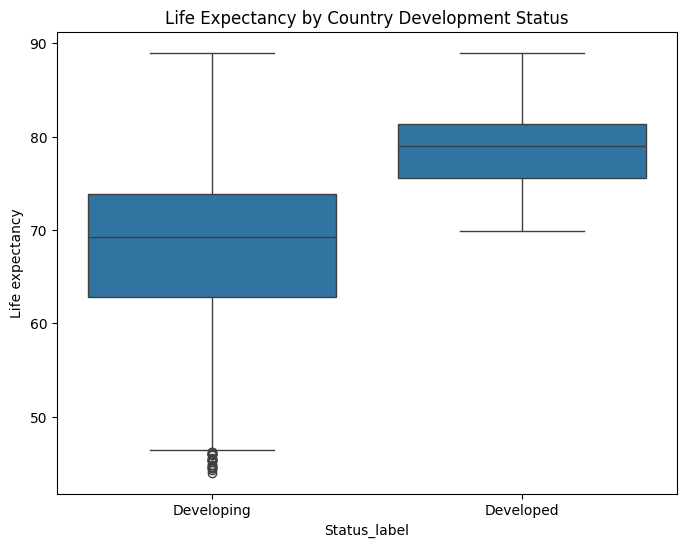

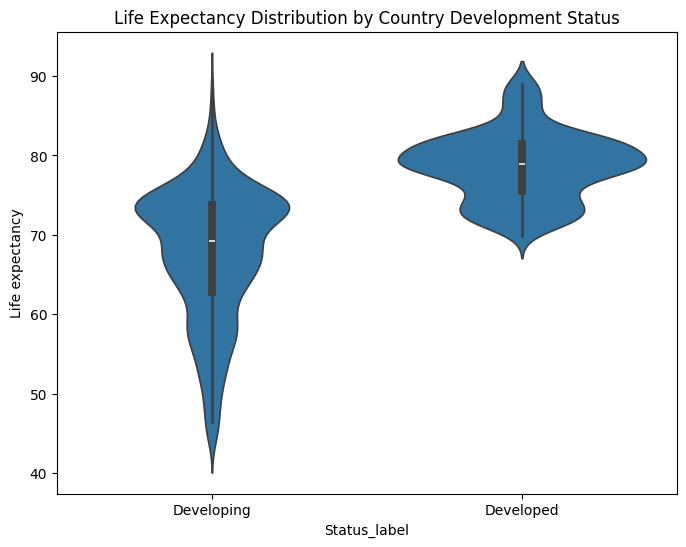

In [129]:
df['Status_label'] = df['Status'].map({0: 'Developing', 1: 'Developed'})

plt.figure(figsize=(8,6))
sb.boxplot(x='Status_label', y='Life expectancy', data=df)
plt.title('Life Expectancy by Country Development Status')
plt.show()

plt.figure(figsize=(8,6))
sb.violinplot(x='Status_label', y='Life expectancy', data=df)
plt.title('Life Expectancy Distribution by Country Development Status')
plt.show()


objective 3 Investigate the Role of Specific Health Interventions  


Regression summary for Hepatitis B:
                             OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     68.58
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.49e-16
Time:                        13:34:25   Log-Likelihood:                -5891.3
No. Observations:                1649   AIC:                         1.179e+04
Df Residuals:                    1647   BIC:                         1.180e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        

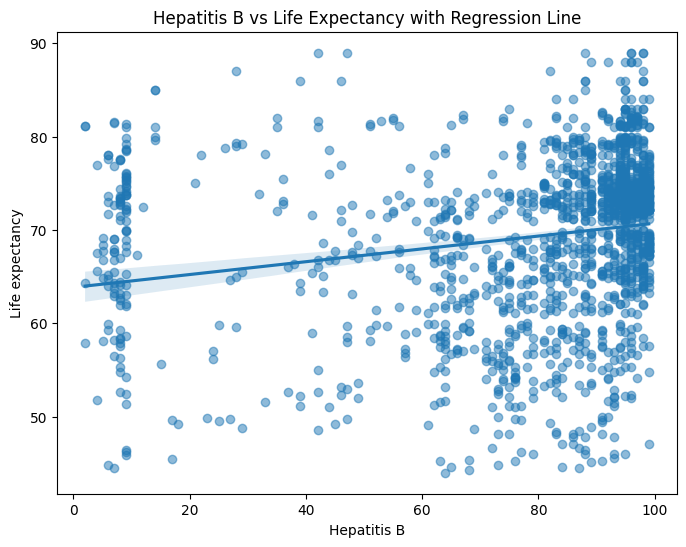

Regression summary for Polio:
                             OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     197.6
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           1.79e-42
Time:                        13:34:28   Log-Likelihood:                -5831.5
No. Observations:                1649   AIC:                         1.167e+04
Df Residuals:                    1647   BIC:                         1.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5856

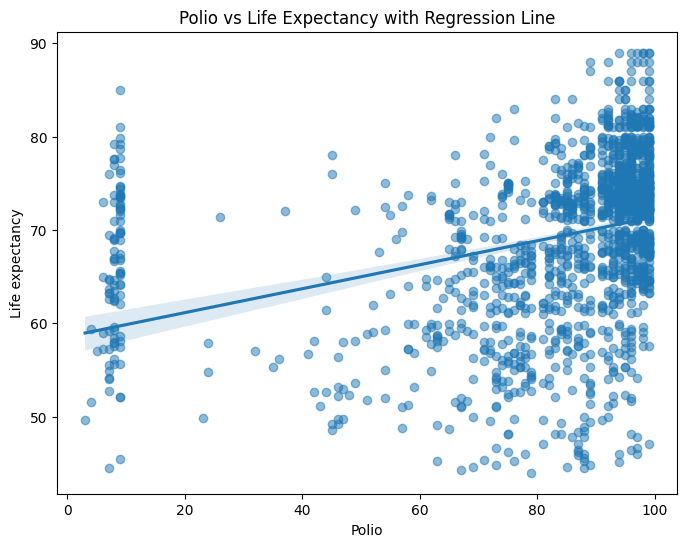

Regression summary for Diphtheria:
                             OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           2.86e-46
Time:                        13:34:30   Log-Likelihood:                -5822.8
No. Observations:                1649   AIC:                         1.165e+04
Df Residuals:                    1647   BIC:                         1.166e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57

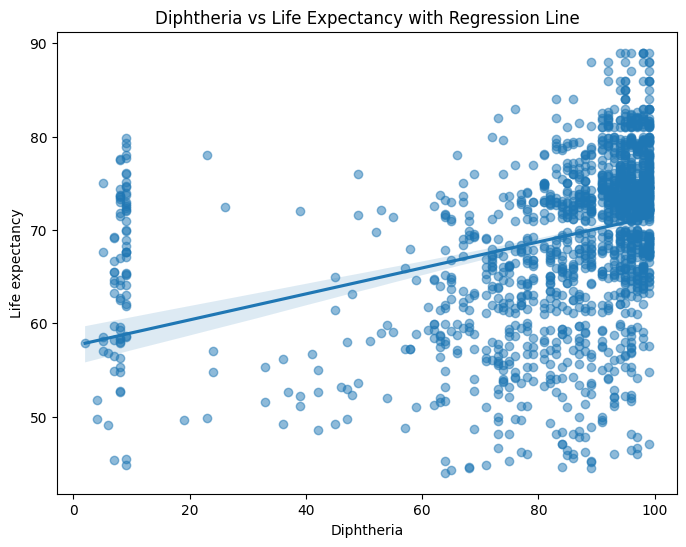

Regression summary for Total expenditure:
                             OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     51.86
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           9.03e-13
Time:                        13:34:33   Log-Likelihood:                -5899.3
No. Observations:                1649   AIC:                         1.180e+04
Df Residuals:                    1647   BIC:                         1.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

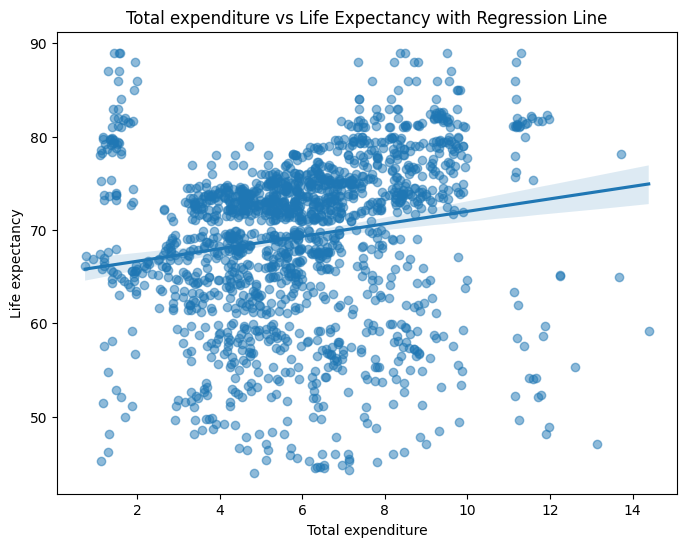

Multiple regression summary:
                             OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     75.66
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           6.17e-59
Time:                        13:34:36   Log-Likelihood:                -5785.6
No. Observations:                1649   AIC:                         1.158e+04
Df Residuals:                    1644   BIC:                         1.161e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

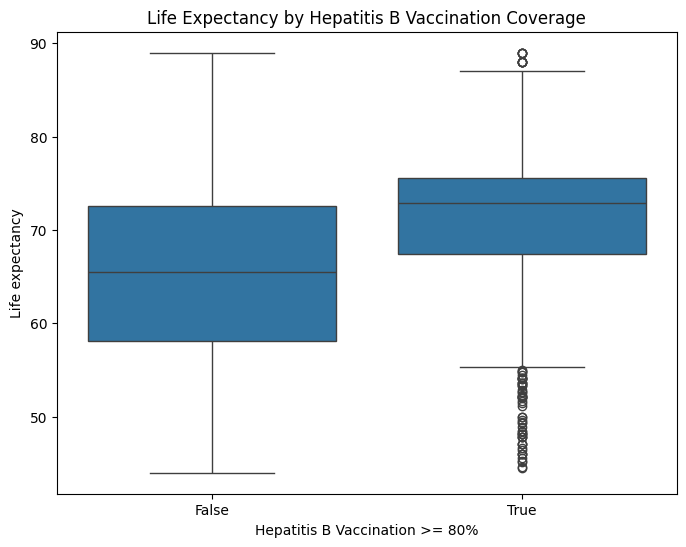

In [131]:
import statsmodels.api as sm


# Variables of interest
health_vars = ['Hepatitis B', 'Polio', 'Diphtheria', 'Total expenditure']
target = 'Life expectancy'

# Simple linear regression for each health variable
for var in health_vars:
    X = df[[var]].copy()
    X = sm.add_constant(X)  # adds intercept term
    y = df[target]
    
    model = sm.OLS(y, X).fit()
    print(f"Regression summary for {var}:\n", model.summary())

    # Scatter plot with regression line
    plt.figure(figsize=(8,6))
    sb.regplot(x=var, y=target, data=df, scatter_kws={'alpha':0.5})
    plt.title(f"{var} vs Life Expectancy with Regression Line")
    plt.show()

# Multiple regression including all health variables
X_multi = df[health_vars]
X_multi = sm.add_constant(X_multi)
y = df[target]

multi_model = sm.OLS(y, X_multi).fit()
print("Multiple regression summary:\n", multi_model.summary())

# Optional: subgroup analysis by vaccination coverage threshold (e.g., Hep B >= 80%)
threshold = 80
high_vax = df[df['Hepatitis B'] >= threshold]
low_vax = df[df['Hepatitis B'] < threshold]

print(f"Mean Life Expectancy for High Hepatitis B vaccination (>= {threshold}%): {high_vax[target].mean():.2f}")
print(f"Mean Life Expectancy for Low Hepatitis B vaccination (< {threshold}%): {low_vax[target].mean():.2f}")

# Boxplot for subgroup comparison
plt.figure(figsize=(8,6))
sb.boxplot(x=df['Hepatitis B'] >= threshold, y=df[target])
plt.xlabel(f'Hepatitis B Vaccination >= {threshold}%')
plt.title('Life Expectancy by Hepatitis B Vaccination Coverage')
plt.show()
